## Observations and Insights 

In [311]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import scipy.stats as sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
mouse_study_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.

mouse_study_df["Mouse ID"].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

ms_grouped=mouse_study_df.groupby(["Mouse ID", "Timepoint"]).count()

msg2=ms_grouped.loc[:,"Drug Regimen"]>1

ms_grouped.where(msg2, inplace = True)

ms_grouped.dropna(how="all")

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                   2.0  2.0         2.0         2.0   
         5                   2.0  2.0         2.0         2.0   
         10                  2.0  2.0         2.0         2.0   
         15                  2.0  2.0         2.0         2.0   
         20                  2.0  2.0         2.0         2.0   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                         2.0               2.0  
         5                         2.0               2.0  
         10                        2.0               2.0  
         15                        2.0               2.0  
         20                        2.0               2.0

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# mouse_study_df.drop_duplicates(subset=["Mouse ID" and "Timepoint"], keep=False)

mouse_study_df.drop((mouse_study_df[mouse_study_df['Mouse ID'] == 'g989']).index, inplace = True)
mouse_study_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.

mouse_study_df["Mouse ID"].count()

1880

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

ms_mean=mouse_study_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

ms_median=mouse_study_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

ms_variance=mouse_study_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

ms_standev=mouse_study_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

ms_sem=mouse_study_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]



In [99]:
ms_merged_df=pd.DataFrame({"Mean Tumor Volume":ms_mean,
                           "Median Tumor Volume":ms_median,
                           "Tumor Volume Variance":ms_variance,
                           "Tumor Volume Standard Deviation": ms_standev,
                           "Tumor Volume SEM":ms_sem
    
    
})

ms_merged_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


        
ms_agg_df=mouse_study_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})
        
ms_agg_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [101]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
ms_drug_counts=mouse_study_df["Drug Regimen"].value_counts()

ms_drug_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

(0.0, 260.0)

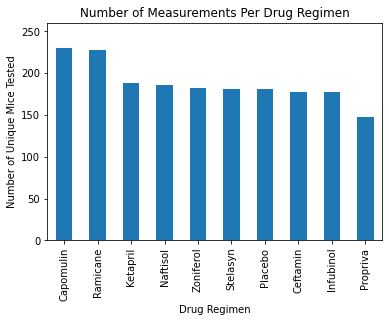

In [103]:
ms_drug_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.title("Number of Measurements Per Drug Regimen")
plt.ylim(0, 260)

<BarContainer object of 10 artists>

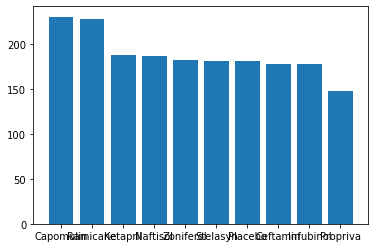

In [59]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(ms_drug_counts.index,ms_drug_counts.values)

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

ms_sex_counts=mouse_study_df["Sex"].value_counts()

ms_sex_counts

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

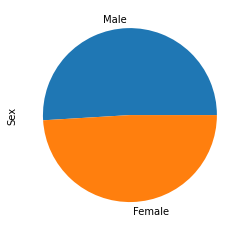

In [58]:
ms_sex_counts.plot(kind="pie")

([<matplotlib.patches.Wedge at 0x1cb4d722100>,
 [Text(-1.0995024239828841, -0.03308201408261565, 'Males'),
  Text(1.0995024239828841, 0.033082014082615026, 'Females')])

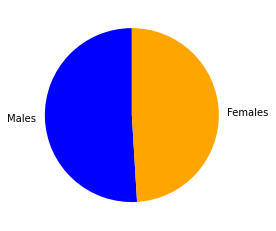

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Males", "Females"]
sizes = ms_sex_counts
colors=["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors, startangle=90)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [120]:
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


max_timepoint=mouse_study_df.groupby("Mouse ID")["Timepoint"].max()

merged_mouse_df=pd.merge(max_timepoint, mouse_study_df, on=["Mouse ID", "Timepoint"])
   
mouse_drug=merged_mouse_df.loc[merged_mouse_df["Drug Regimen"].isin(drug_list)]    

mouse_drug


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [220]:
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_dicts_list=[]

for each_drug in drug_list:
    drug_filter=mouse_drug.loc[:,"Drug Regimen"]==each_drug
    
    drug_filter_again=mouse_drug.loc[drug_filter, "Tumor Volume (mm3)"]
# drug_filter_again.head(100)
    drug_filter_dict={
        "Drug":each_drug,
        "TVol":drug_filter_again
        
    }

    drug_dicts_list.append(drug_filter_dict)


    quantiles=drug_filter_again.quantile([.25, .5, .75])
    
    
    
    lowerq=quantiles[.25]
    upperq=quantiles[.75]
    irq=upperq-lowerq
    
    lower_bound=lowerq-(1.5*irq)
    upper_bound=upperq+(1.5*irq)
    
    subset_filter=(drug_filter_again<lower_bound) | (drug_filter_again>upper_bound)
    
    
    outlier=drug_filter_again[subset_filter]
    outlier
       
    print(f'My outlier for {each_drug} is {outlier}')
    
    
    
    

[{'Drug': 'Capomulin',
  'TVol': 19     38.982878
  24     38.939633
  61     30.485985
  64     37.074024
  66     40.159220
  80     47.685963
  83     37.311846
  85     38.125164
  87     38.753265
  108    41.483008
  115    38.846876
  121    28.430964
  124    33.329098
  162    46.539206
  163    32.377357
  169    41.581521
  174    23.343598
  180    40.728578
  183    34.455298
  192    31.023923
  204    40.658124
  208    39.952347
  220    36.041047
  226    28.484033
  239    31.896238
  Name: Tumor Volume (mm3), dtype: float64},
 {'Drug': 'Ramicane',
  'TVol': 6      38.407618
  7      43.047543
  10     38.810366
  12     32.978522
  33     38.342008
  37     33.397653
  45     37.311236
  52     40.659006
  70     29.128472
  76     33.562402
  77     36.374510
  91     31.560470
  93     36.134852
  96     22.050126
  119    30.564625
  126    31.095335
  157    45.220869
  158    36.561652
  166    37.225650
  168    43.419381
  177    30.276232
  190    40.667713
 

TypeError: cannot perform reduce with flexible type

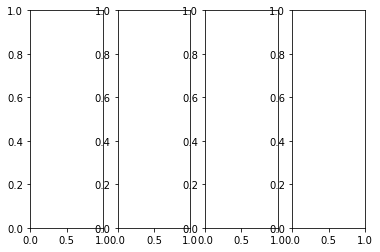

In [239]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#I don't know what's happening here. I was trying to unpack the dictionary to get the tumor volume for each drug. My brain is giving up on this one.
column_list=drug_list
fig, axes = plt.subplots(nrows=1, ncols=4)
ax1.set_title("Final Tumor Volume Across Four Drug Regimens")
ax1.set_ylabel("Final Tumor Volume")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot("Drug", "TVol", showfliers=False)


# drug_filter_dict={
#         "Drug":each_drug,
#         "TVol":drug_filter_again


## Line and Scatter Plots

TypeError: object of type 'int' has no len()

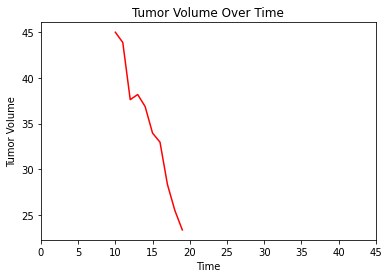

In [318]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

single_mouse=mouse_study_df["Mouse ID"]=="s185"

single_mouse_df=mouse_study_df[single_mouse]

single_mouse_df["Tumor Volume (mm3)"].plot(kind="line", color="red")

plt.title("Tumor Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")

plt.xticks(single_mouse_df["Timepoint"])
plt.yticks(20, 50)
plt.xlim(20,40)
plt.ylim(0, 45)

# The line was acting weird when trying to adjust the X and Y ticks and lim, and at one point the line just completely disappeared from the graph.

<AxesSubplot:title={'center':'Mouse Weight vs Tumor Volume - Capomulin Drug Regimen'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

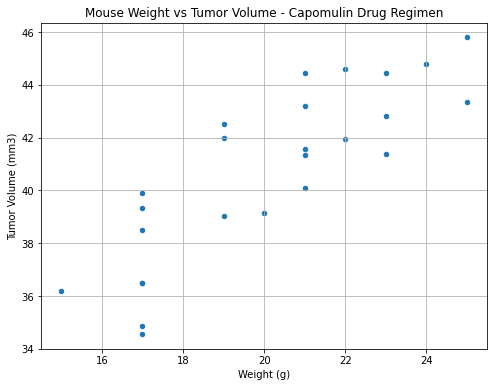

In [309]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_mouse=mouse_study_df["Drug Regimen"]=="Capomulin"

cap_mouse_df=mouse_study_df[cap_mouse]

cap_mouse_avg_df=cap_mouse_df.groupby("Mouse ID").mean()

cap_mouse_avg_df

cap_mouse_avg_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,6),
              title="Mouse Weight vs Tumor Volume - Capomulin Drug Regimen")

## Correlation and Regression

In [312]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x=cap_mouse_avg_df["Weight (g)"]
y=cap_mouse_avg_df["Tumor Volume (mm3)"]
sts.pearsonr(x, y)

(0.8419363424694717, 1.322572243471279e-07)